In [57]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import argparse

train_eccs = [-1,0,5,10,15,20,100,-2]
metric = 'AP'

val_eccs = [0,5,10,15,20]

train_eccs = [int(ecc) for ecc in train_eccs]
eval_metric = metric

#change this to path with val_recults.pkl
eval_path = './'

eval_results = {}
for train_ecc in train_eccs:
    # print(train_ecc)
    eval_results[train_ecc] = []
    for ecc in val_eccs:
        # print(ecc)
        #baseline model
        if train_ecc == -1:
            val_results_path = f'{eval_path}/baseline_pretrained_detectron2_eval_results/coco_val_2017_ecc{ecc}_eval/val_results.pkl'
        #train from scratch
        elif train_ecc == -2:
            val_results_path = f'{eval_path}/trainscratch_ecc100/coco_val_2017_ecc{ecc}_eval/val_results.pkl'
        #fine-tunded models
        else:
            val_results_path = f'{eval_path}/finetune_ecc{train_ecc}/coco_val_2017_ecc{ecc}_eval/val_results.pkl'
        with open(val_results_path, 'rb') as f:
                val_results = pickle.load(f)
        eval_results[train_ecc].append(val_results['bbox'][eval_metric])



In [58]:
eval_results

{-1: [36.66723372433459,
  29.435971253311898,
  19.86221569971819,
  5.907704581729338,
  4.166732477402176],
 0: [35.11524455202995,
  27.99130173776857,
  18.417571218761193,
  5.382900656031952,
  3.7602175211675943],
 5: [36.17649419114624,
  31.67785870899274,
  23.945616442855368,
  7.349407544614864,
  5.101577929987869],
 10: [36.08903278173518,
  31.54739510663149,
  27.36806452466249,
  10.023343683604853,
  7.084875574758797],
 15: [35.60656590662227,
  29.820907180299365,
  25.62157417747455,
  14.43493486074824,
  11.480987292557236],
 20: [35.93269445841636,
  29.893457977328282,
  25.47830318832854,
  14.58687672856,
  11.901546684811752],
 100: [36.08217757627597,
  31.80644573383966,
  27.72218992839699,
  13.859482381638868,
  10.803678570393282],
 -2: [33.83329509835041,
  30.461032852996656,
  28.06539426880439,
  15.790964155555393,
  12.734474861571709]}

Text(0, 0.5, 'Bounding Box Average Precision (AP)')

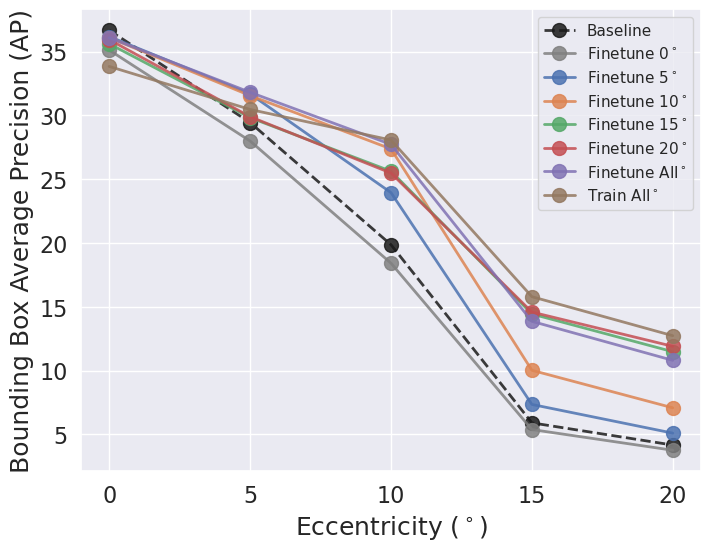

In [61]:
AP_labels = [0,5,10,15,20]
sns.set()
plt.figure(figsize=(8,6))
for train_ecc in train_eccs:
    if train_ecc==-1:
        plt.plot(AP_labels, eval_results[train_ecc],'--o',color='k',alpha=0.85,linewidth=2,markersize=10,label=f'Baseline')
    elif train_ecc==-2:
        plt.plot(AP_labels, eval_results[train_ecc],'-o',alpha=0.85,linewidth=2,markersize=10,label=f'Train All$^\circ$')
    elif train_ecc==0:
        plt.plot(AP_labels, eval_results[train_ecc],'-o',color='grey',alpha=0.85,linewidth=2,markersize=10,label=f'Finetune 0$^\circ$')
    elif train_ecc==100:
        plt.plot(AP_labels, eval_results[train_ecc],'-o',linewidth=2,markersize=10,alpha=0.85,label=f'Finetune All$^\circ$')
    else:
        plt.plot(AP_labels, eval_results[train_ecc],'-o',linewidth=2,markersize=10,alpha=0.85,label=f'Finetune {train_ecc}$^\circ$')
# plt.plot(AP_labels, AP_data,'--o',linewidth=4,markersize=12, color='green')
plt.xticks(AP_labels,fontsize=16)
plt.yticks(fontsize=16)
# plt.title(title,fontsize=24,y=1.08)
#plt.ylim([0,50])
plt.legend()
# plt.grid()
plt.xlabel('Eccentricity ($^\circ$)', fontsize=18)
plt.ylabel(f'Bounding Box Average Precision ({eval_metric})',fontsize=18)

In [51]:
#add type of evalution to filename
output_path = './final_models_finetuned.png'

plt.savefig(output_path,dpi=300)

<Figure size 640x480 with 0 Axes>